# Browserbase Tutorial: Web Automation with Playwright

Welcome to this tutorial on Browserbase! 🚀

Browserbase is a powerful platform that allows you to run and manage headless browsers in the cloud. This is incredibly useful for web scraping, automated testing, and building AI agents that can interact with the web.

In this notebook, we'll cover the essential concepts to get you started with Browserbase using their Python SDK and Playwright.

## 1. Installation

First, you'll need to install the `browserbase` and `playwright` libraries. We'll also use `python-dotenv` to manage our API keys securely.

In [18]:
#!pip install browserbase playwright python-dotenv -q

## 2. Setup API Keys

To use Browserbase, you'll need an API key and a Project ID. You can get these from your [Browserbase dashboard](https://www.browserbase.com/).

For security best practices, we will store our credentials in a `.env` file. Create a file named `.env` in the same directory as this notebook and add your credentials like this:

```
BROWSERBASE_API_KEY=your_api_key
BROWSERBASE_PROJECT_ID=your_project_id
```

Now, we can load these variables into our environment.

In [19]:
import os
from dotenv import load_dotenv

load_dotenv()

True

## 3. Your First Browser Session

Now for the fun part! Let's create a browser session in the cloud. A session is a single browser instance that you can connect to and control.

In [20]:
from browserbase import Browserbase

# Initialize the Browserbase client
bb = Browserbase()

# Create a new session
session = bb.sessions.create(
    project_id=os.getenv("BROWSERBASE_PROJECT_ID")
)

print(f"Session created with ID: {session.id}")

Session created with ID: 988841ae-483e-4204-9619-273a9b2ea5a0


## 4. Connecting with Playwright

Browserbase provides a connection URL that we can use with Playwright to control the remote browser. Let's connect to the session we just created.

Screenshot 'google.png' saved!


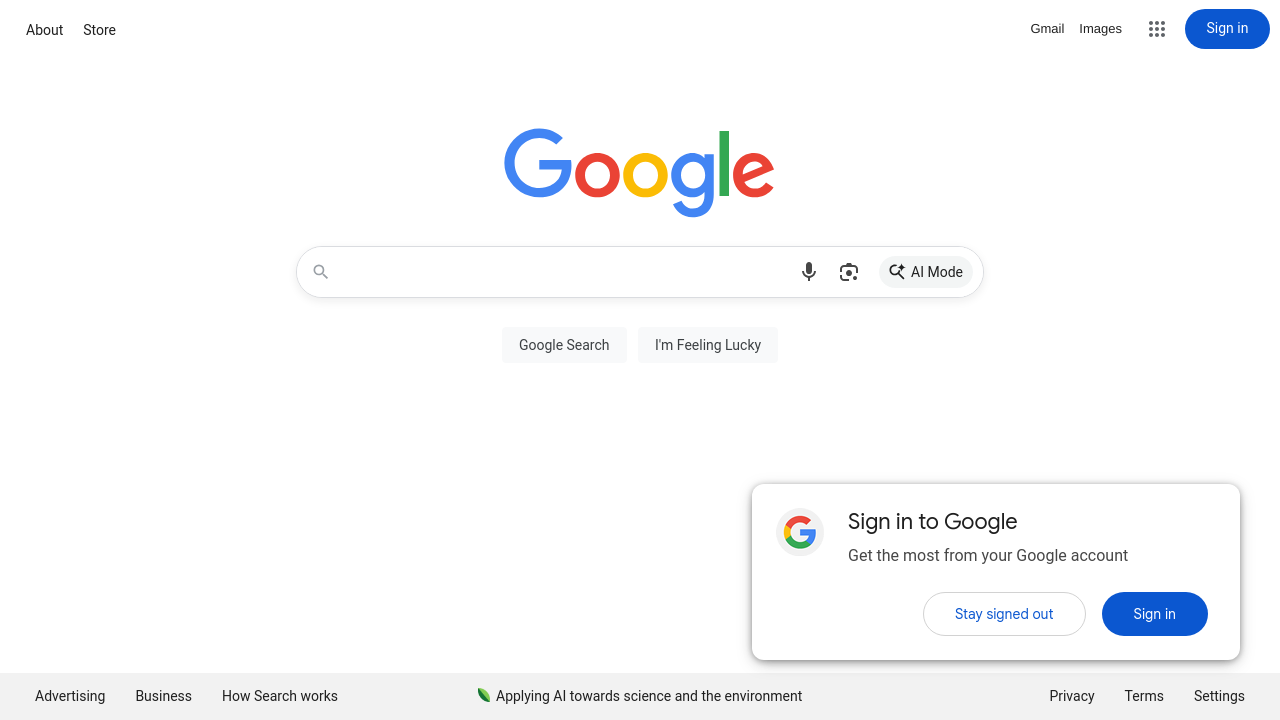

In [21]:
import nest_asyncio
import asyncio
from playwright.async_api import async_playwright
from IPython.display import Image, display

nest_asyncio.apply()

async def main():
    async with async_playwright() as p:
        # Connect to the Browserbase session
        browser = await p.chromium.connect_over_cdp(session.connect_url)
        page = await browser.new_page()

        # Let's navigate to a page and take a screenshot
        await page.goto("https://www.google.com")
        await page.screenshot(path="google.png")

        print("Screenshot 'google.png' saved!")
        display(Image(filename="google.png"))

        # Don't forget to close the browser
        await browser.close()

# Run the async main function
await main()

## 5. Stealth Mode and Proxies

Browserbase's **Stealth Mode** helps you avoid bot detection. You can enable it when creating a session. You can also use proxies for more robust scraping.

In [22]:
# Example of creating a session with stealth mode and proxies
stealthy_session = bb.sessions.create(
    project_id=os.getenv("BROWSERBASE_PROJECT_ID"),
    browser_settings={
        "stealth": True,
        "proxy": True
    }
)

print(f"Stealthy session created with ID: {stealthy_session.id}")

Stealthy session created with ID: e3e64540-41c3-4bd7-acd5-e30f2b23bbf4


## 6. Managing Sessions

You can list, get details of, and close sessions using the Browserbase client.

In [23]:
# List all sessions
all_sessions = bb.sessions.list()
print(f"Found {len(all_sessions)} sessions.")

# Close all sessions
for s in all_sessions:
    updated_session = bb.sessions.update(s.id, status="REQUEST_RELEASE", project_id=os.getenv("BROWSERBASE_PROJECT_ID"))
    print(f"Closed session {updated_session.id}, status: {updated_session.status}")

Found 6 sessions.
Closed session e3e64540-41c3-4bd7-acd5-e30f2b23bbf4, status: COMPLETED
Closed session 988841ae-483e-4204-9619-273a9b2ea5a0, status: COMPLETED
Closed session cc67b68f-398b-4f54-9ad4-acad33e5c701, status: COMPLETED
Closed session 79af715e-62ac-41e8-b3fe-9c4a088c20ad, status: COMPLETED
Closed session ecb1f2c6-2a62-4f44-b1d6-bb63f7419279, status: TIMED_OUT
Closed session 7be1bd55-34bf-4151-871b-0fd0a4506095, status: COMPLETED


## Conclusion

And that's it! You now know the basics of using Browserbase with their Python SDK and Playwright. 🎉

You've learned how to:
* Setup your environment and API keys
* Create and connect to a browser session
* Use Playwright to control the browser
* Use features like Stealth Mode
* Manage your sessions

For more advanced features and details, be sure to check out the official [Browserbase Documentation](https://docs.browserbase.com/).